In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
from statsmodels.iolib.summary2 import summary_col
from linearmodels import PanelOLS

In [2]:
df1 = pd.read_stata('SeatBelts.dta')
df1.head()

,state,year,vmtrural,vmturban,fips,vmt,fatalityrate,sb_useage,speed65,speed70,drinkage21,ba08,income,age,primary,secondary
0,AK,1983,2117.0,1241.0,2,3358.0,0.044669,NaN,0.0,0.0,1.0,0.0,17973.0,28.234966,0.0,0.0
1,AK,1984,2294.0,1295.0,2,3589.0,0.037336,NaN,0.0,0.0,1.0,0.0,18093.0,28.343542,0.0,0.0
2,AK,1985,2059.0,1781.0,2,3840.0,0.033073,NaN,0.0,0.0,1.0,0.0,18925.0,28.372816,0.0,0.0
3,AK,1986,2175.0,1833.0,2,4008.0,0.025200,NaN,0.0,0.0,1.0,0.0,18466.0,28.396652,0.0,0.0
4,AK,1987,2123.0,1777.0,2,3900.0,0.019487,NaN,0.0,0.0,1.0,0.0,18021.0,28.453251,0.0,0.0


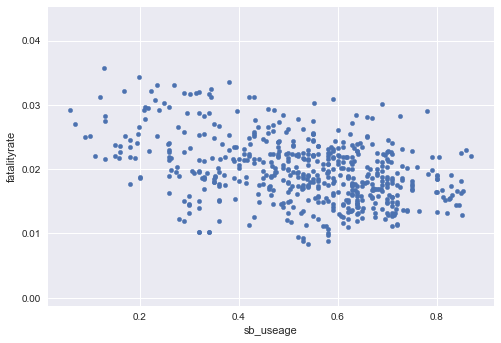

In [3]:
plt.style.use('seaborn')
df1.plot(x='sb_useage', y='fatalityrate', kind='scatter')
plt.show()

In [4]:
df1['const'] = 1
df1['log_income'] = np.log(df1['income'])
df1 = df1.dropna()
reg1 = sm.OLS(endog=df1['fatalityrate'], exog=df1[['const', 'sb_useage', 'speed65', 'speed70', 'ba08', 'drinkage21', 'log_income', 'age']])

results1 = reg1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:           fatalityrate   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     95.41
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           1.26e-90
Time:                        21:33:37   Log-Likelihood:                 2375.7
No. Observations:                 556   AIC:                            -4735.
Df Residuals:                     548   BIC:                            -4701.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1965      0.008     23.901      0.0

a. The estimated regression does not suggest that increased seat belt use reduces fatalities. fatality rate and seatbelt usages are positively correlated and is significant.

In [5]:
dummy = pd.get_dummies(df1['state'])
dummy.head()

df1 = pd.concat([df1, dummy], axis=1)

reg2 = sm.OLS(endog=df1['fatalityrate'], exog=df1[['const', 'sb_useage', 'speed65', 'speed70', 'ba08', 'drinkage21', 'log_income', 'age', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']])

results2 = reg2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:           fatalityrate   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     68.39
Date:                Mon, 19 Apr 2021   Prob (F-statistic):          7.18e-200
Time:                        21:33:38   Log-Likelihood:                 2759.6
No. Observations:                 556   AIC:                            -5403.
Df Residuals:                     498   BIC:                            -5153.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1188      0.010     12.405      0.0

b. Yes, now the results suggest that increased seat belt use reduces fatality. There must have been an omitted variable bias that differ across entities but are constant over time. We are controlling for the average differences across states in any observable or unobservable predictors.

In [6]:
dummy2 = pd.get_dummies(df1['year'])

df1 = pd.concat([df1, dummy2], axis=1)

reg3 = sm.OLS(endog=df1['fatalityrate'], exog=df1[['const', 'sb_useage', 'speed65', 'speed70', 'ba08', 'drinkage21', 'log_income', 'age', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997]])

results3 = reg3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:           fatalityrate   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     68.76
Date:                Mon, 19 Apr 2021   Prob (F-statistic):          6.28e-211
Time:                        21:33:40   Log-Likelihood:                 2823.0
No. Observations:                 556   AIC:                            -5502.
Df Residuals:                     484   BIC:                            -5191.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0765      0.037     -2.084      0.0

c. Yes, the seat belt's effect on fatality is less negative.

d. The regression specification in (c) is most reliable because it includes fixed effects that control for both time invariant bias and time varying bias. There must be unobserved differences between states and years that bias estimates even after including control variables.

e. It is large. A unit of seatbelt usage decreases the fatality rate by 0.0037. Seatbelt usage is out of 1 so 1% increase in seatbelt usage decreases fatality rate by 0.37 number of fatalities per million of traffic miles. 48% increase leads to 17.76 less number of fatalities per million of traffic miles. Average vmt, millions of traffic miles per year, across all years and states is around 41400. We can save around 735000 lives per year.

In [7]:
reg4 = sm.OLS(endog=df1['sb_useage'], exog=df1[['const', 'speed65', 'speed70', 'ba08', 'drinkage21', 'log_income', 'age', 'primary', 'secondary', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997]])

results4 = reg4.fit()

print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:              sb_useage   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     61.47
Date:                Mon, 19 Apr 2021   Prob (F-statistic):          5.07e-201
Time:                        21:33:42   Log-Likelihood:                 840.79
No. Observations:                 556   AIC:                            -1536.
Df Residuals:                     483   BIC:                            -1220.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6563      1.300     -0.505      0.6

f. Both the primary and secondary enforcements lead to more seatbelt use. Primary enforcement leads to 20 percent increase while secondary enforcement leads to 10 percent increase.

g. Changing the enforcement will lead to 0.0971 increase in seatbelt useage. This increase in useage will lead to 3.5927 decrease in fatalities per million of traffic miles. New Jersey has high traffic and averages around 60000 in recent years. (recent to 2000) Thus it will save around 215500 lives.